# 弧度和三角学

- 角度与弧度以及转换关系
- 极坐标系和笛卡尔坐标系以及转换关系
- 求向量夹角

一个二维向量的位置可以有两种确认方式:
- $x$ 坐标轴分量和 $y$ 坐标轴分量, 称之为**笛卡尔坐标**
- 向量的长度和相对于 $x$ 轴(或 $y$ 轴) 的角度(弧度), 称之为**极坐标**


## 1. Python 中的弧度和三角函数

一般运算时, 不会直接使用**角度** (angle) 这个概念, 而是使用**弧度** (radian), 弧度和 $\pi$ 值有较为紧密的关系, 更适合计算.

`1` 弧度($rad$) 定义如下: 

$\begin{aligned}
\pi rad &= 180° \\
2\pi rad &= 360° \\
1rad &= \frac {\pi} {180°} \approx 57.296° \approx 57°17'44.806''
\end{aligned}$

绕圆半圈的弧度为 $\pi$, 整圈的弧度是 $2\pi$, 分别与半径为 `1` 的圆的半周长和周长一致;

![x](../assets/rad.jpeg) 半周长的弧度是 $\pi$，周长的弧度是 $2\pi$

**知识:** 各弧度对应三角函数结果

In [1]:
import math


# 常见弧度值
rads = [
    (0, "0°"),
    (math.pi / 6, "30°"),
    (math.pi / 4, "45°"),
    (math.pi / 3, "60°"),
    (math.pi / 2, "90°"),
    (2 * math.pi / 3, "120°"),
    (3 * math.pi / 4, "135°"),
    (5 * math.pi / 6, "150°"),
    (math.pi, "180°"),
    (3 * math.pi / 2, "270°"),
]


def format(v: float) -> str:
    """格式化计算结果

    Args:
        `v` (`float`): 计算结果

    Returns:
        `str`: 格式化后的计算结果
    """
    if v < 10:
        # 正常值, 返回 2 位小数
        return f"{round(v, 2)}"

    # 返回表示无穷大的值
    return "∞"


for r in rads:
    # 输出弧度的正弦值
    v = math.sin(r[0])
    print(f"sin({r[1]}) = {format(v)}", end="    ")

    # 输出弧度的余弦值
    v = math.cos(r[0])
    print(f"cos({r[1]}) = {format(v)}", end="    ")

    # 输出弧度的正切值
    v = math.tan(r[0])
    print(f"tan({r[1]}) = {format(v)}")

sin(0°) = 0.0    cos(0°) = 1.0    tan(0°) = 0.0
sin(30°) = 0.5    cos(30°) = 0.87    tan(30°) = 0.58
sin(45°) = 0.71    cos(45°) = 0.71    tan(45°) = 1.0
sin(60°) = 0.87    cos(60°) = 0.5    tan(60°) = 1.73
sin(90°) = 1.0    cos(90°) = 0.0    tan(90°) = ∞
sin(120°) = 0.87    cos(120°) = -0.5    tan(120°) = -1.73
sin(135°) = 0.71    cos(135°) = -0.71    tan(135°) = -1.0
sin(150°) = 0.5    cos(150°) = -0.87    tan(150°) = -0.58
sin(180°) = 0.0    cos(180°) = -1.0    tan(180°) = -0.0
sin(270°) = -1.0    cos(270°) = -0.0    tan(270°) = ∞


**知识:** 反三角函数

In [2]:
import math

from utils.typedef import Number


def format(formula: str, rad: Number, patch: Number = 0) -> str:
    """格式化输出内容

    Args:
        `formula` (`str`): 公式
        `rad` (`Number`): 弧度
        `patch` (`int`, optional): 补偿角度, 对于反三角函数, 同一个数值可能计算出两个角度. Defaults to `0`.

    Returns:
        `str`: 格式化结果
    """
    # 将弧度转为角度
    angle = round(rad / (math.pi / 180))
    return f"{formula} = {rad}, angle = {abs(angle + patch)}°"


# 反正弦 0 的角度为 0°
print(format("asin(0)", math.asin(0)))
# 反正弦 1/2 的角度为 30° 或 150°
print(format("asin(1/2)", math.asin(1 / 2)))
# 反正弦 sqrt(2)/2 的角度为 45° 或 135°
print(format("asin(sqrt(2)/2)", math.asin(math.sqrt(2) / 2)))
# 反正弦 sqrt(3)/2 的角度为 60° 或 120°
print(format("asin(sqrt(3)/2)", math.asin(math.sqrt(3) / 2)))
# 反正弦 1 的角度为 90°
print(format("asin(1)", math.asin(1)))
# 反正弦 sqrt(3)/2 的角度为 60° 或 120°
print(format("asin(sqrt(3)/2)", math.asin(math.sqrt(3) / 2), patch=-180))
# 反正弦 sqrt(2)/2 的角度为 45° 或 135°
print(format("asin(sqrt(2)/2)", math.asin(math.sqrt(2) / 2), patch=-180))
# 反正弦 1/2 的角度为 30° 或 150°
print(format("asin(1/2)", math.asin(1 / 2), patch=-180))
# 反正弦 -1 的角度为 270°
print(format("asin(-1)", math.asin(-1), patch=-180))
print()

# 反余弦 1 的角度为 0°
print(format("acos(1)", math.acos(1)))
# 反余弦 sqrt(3)/2 的角度为 30°
print(format("acos(sqrt(3)/2)", math.acos(math.sqrt(3) / 2)))
# 反余弦 sqrt(2)/2 的角度为 45°
print(format("acos(sqrt(2)/2)", math.acos(math.sqrt(2) / 2)))
# 反余弦 1/2 的角度为 60°
print(format("acos(1/2)", math.acos(1 / 2)))
# 反余弦 0 的角度为 90° 或 270°
print(format("acos(0)", math.acos(0)))
# 反余弦 -1/2 的角度为 120°
print(format("acos(-1/2)", math.acos(-1 / 2)))
# 反余弦 -sqrt(2)/2 的角度为 135°
print(format("acos(-sqrt(2)/2)", math.acos(-math.sqrt(2) / 2)))
# 反余弦 -sqrt(3)/2 的角度为 150°
print(format("acos(-sqrt(3)/2)", math.acos(-math.sqrt(3) / 2)))
# 反余弦 -1 的角度为 180°
print(format("acos(-1)", math.acos(-1)))
# 反余弦 0 的角度为 90° 或 270°
print(format("acos(0)", math.acos(0), patch=180))
print()

# 反正切 0 的角度为 0°
print(format("atan(0)", math.atan(0)))
# 反正切 sqrt(3)/3 的角度为 30°
print(format("atan(sqrt(3)/3)", math.atan(math.sqrt(3) / 3)))
# 反正切 1 的角度为 45°
print(format("atan(1)", math.atan(1)))
# 反正切 sqrt(3) 的角度为 60°
print(format("atan(sqrt(3))", math.atan(math.sqrt(3))))
# 反正切 -sqrt(3) 的角度为 120°
print(format("atan(-sqrt(3))", math.atan(-math.sqrt(3)), patch=180))
# 反正切 -1 的角度为 135°
print(format("atan(-1)", math.atan(-1), patch=180))
# 反正切 -sqrt(3)/3 的角度为 150°
print(format("atan(-sqrt(3)/3)", math.atan(-math.sqrt(3) / 3), patch=180))
# 反正切 0 的角度为 180°
print(format("atan(0)", math.atan(0), patch=180))

asin(0) = 0.0, angle = 0°
asin(1/2) = 0.5235987755982989, angle = 30°
asin(sqrt(2)/2) = 0.7853981633974484, angle = 45°
asin(sqrt(3)/2) = 1.0471975511965976, angle = 60°
asin(1) = 1.5707963267948966, angle = 90°
asin(sqrt(3)/2) = 1.0471975511965976, angle = 120°
asin(sqrt(2)/2) = 0.7853981633974484, angle = 135°
asin(1/2) = 0.5235987755982989, angle = 150°
asin(-1) = -1.5707963267948966, angle = 270°

acos(1) = 0.0, angle = 0°
acos(sqrt(3)/2) = 0.5235987755982989, angle = 30°
acos(sqrt(2)/2) = 0.7853981633974483, angle = 45°
acos(1/2) = 1.0471975511965979, angle = 60°
acos(0) = 1.5707963267948966, angle = 90°
acos(-1/2) = 2.0943951023931957, angle = 120°
acos(-sqrt(2)/2) = 2.356194490192345, angle = 135°
acos(-sqrt(3)/2) = 2.6179938779914944, angle = 150°
acos(-1) = 3.141592653589793, angle = 180°
acos(0) = 1.5707963267948966, angle = 270°

atan(0) = 0.0, angle = 0°
atan(sqrt(3)/3) = 0.5235987755982988, angle = 30°
atan(1) = 0.7853981633974483, angle = 45°
atan(sqrt(3)) = 1.04719755119

**知识:** 将角度转换为弧度

In [3]:
import math

# 定义 1° 角度对应的弧度
ONE_DEGREE = math.pi / 180


def to_radian(angle: Number) -> Number:
    """将角度转换为弧度

    Args:
        `angle` (`Number`): 角度

    Returns:
        `Number`: 对应的弧度
    """
    return angle * ONE_DEGREE


# 计算 116.57° 对应多少弧度
to_radian(116.57)

2.03453030904979

**知识:** 将弧度转换为角度

In [4]:
import math

# 定义 1 弧度对应的角度
ONE_RAD = 180 / math.pi


def to_degree(radian: Number) -> Number:
    """将弧度转换为角度

    Args:
        `radian` (`Number`): 弧度

    Returns:
        `Number`: 对应的角度
    """
    return radian * ONE_RAD


# 计算 2.03453030904979 弧度对应多少角度
to_degree(2.03453030904979)

116.57000000000001

## 2. 笛卡尔坐标和极坐标

**知识:** 将极坐标值转为笛卡尔坐标值

已知向量长度为 `8.5`, 向量角度为 `125°`, 则绘制向量在笛卡尔坐标的点

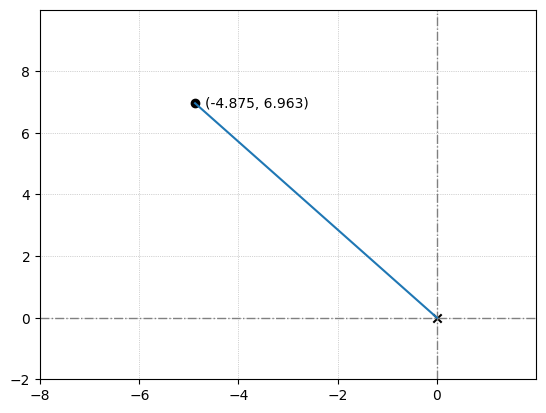

In [5]:
import math

from utils.vector import to_radian
from utils.draw.component import Points2D, Segment2D, draw2d

# 向量长度
r = 8.5
# 向量弧度
rad = to_radian(125)

# 向量 x 分量
x = r * math.cos(rad)
# 向量 y 分量
y = r * math.sin(rad)

draw2d(
    [
        Points2D([(x, y)]),
        Segment2D((0, 0), (x, y)),
    ],
    grid=(2, 2),
    nice_aspect_ratio=False,
)

In [6]:
import math

from utils.typedef import Polar, Vector2D


def to_cartesian(polar_vector: Polar) -> Vector2D:
    """将极坐标向量转换为笛卡尔坐标

    Args:
        `polar_vector` (`Polar`): 极坐标向量, 两个分量为 `(向量长度, 弧度)`

    Returns:
        `Vector2D`: 极坐标向量
    """
    # 获取极坐标向量分量
    length, angle = polar_vector[0], polar_vector[1]

    # 通过余弦函数和正弦函数求笛卡尔 x, y 坐标
    return (length * math.cos(angle), length * math.sin(angle))

求沿 `37°` 角的方向移动 `5` 个单位的笛卡尔坐标

In [7]:
from utils.vector import to_cartesian, to_radian

angle = to_radian(37)  # 求 37° 角度的弧度

to_cartesian((5, angle))  # 角度 37°, 5 个单位的笛卡尔坐标约为 (4, 3)

(3.993177550236464, 3.0090751157602416)

**知识:** 通过 `atan2` 函数计算笛卡尔坐标点对应的弧度

In [8]:
import math

from utils.vector import to_degree

vector = (-2, 3)

# 求对应的弧度
rad = math.atan2(vector[1], vector[0])
print(f"radian is: {rad}")

# 弧度转为角度
angle = to_degree(rad)
print(f"angle is: {angle}")

radian is: 2.158798930342464
angle is: 123.69006752597979


**知识:** 将笛卡尔坐标转为极坐标

In [9]:
import math

from utils.typedef import Polar, Vector2D
from utils.vector import length


def to_polar(v: Vector2D) -> Polar:
    """将笛卡尔坐标向量转换为极坐标向量

    Args:
        `v` (`Vector2D`): 笛卡尔坐标向量

    Returns:
        `Polar`: 极坐标向量
    """
    # 获取笛卡尔坐标向量的分量
    x, y = v[0], v[1]

    # 利用 atan2 函数, 根据笛卡尔坐标分量求弧度
    angle = math.atan2(y, x)

    # 利用 length 函数求向量的长度, 返回极坐标向量
    return (length(v), angle)

求笛卡尔坐标 `(-2, 3)` 到极坐标的转换

In [10]:
from utils.vector import to_polar

to_polar((-2, 3))  # 返回长度 3.6, 弧度 2.16 左右的极坐标

(3.605551275463989, 2.158798930342464)

**练习:** 推导如下公式的向量值 `[(cos(5 * x * pi / 500.0), 2 * pi * x / 1000.0) for x in range(0,1000)]`, 并绘制图形

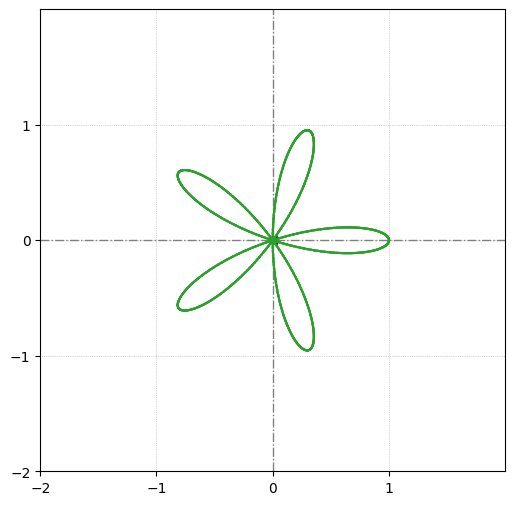

In [11]:
import math

from utils.vector import to_cartesian
from utils.draw.component import Color, Polygon2D, draw2d

# 获取公式推算出的极坐标向量集合
polar_coords = [
    (math.cos(5 * x * math.pi / 500.0), 2 * math.pi * x / 1000.0) for x in range(1000)
]

# 将极坐标集合转为笛卡尔坐标向量集合
vs = [to_cartesian(pv) for pv in polar_coords]

# 绘制笛卡尔坐标下的图形
draw2d(
    [Polygon2D(vs, color=Color.green())],  # 将坐标点用线段连接, 绘制图形
)

## 3. 求两个向量的夹角

**知识:** 求两个向量的夹角

两个向量的夹角即向量相对于 $x$ 坐标轴夹角的**和**或者**差**

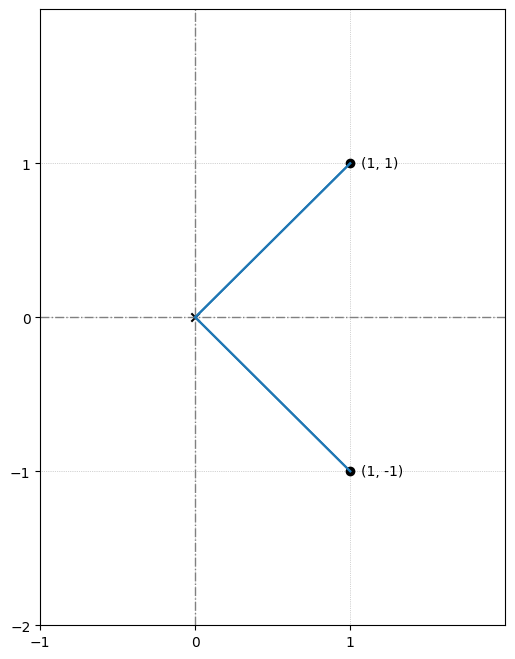

angle of v1 is: 45.0
angle of v1 is: -45.0
angle between v1 and v2 is: 90.0


In [12]:
import math

from utils.vector import to_degree
from utils.draw.component import Points2D, Polygon2D, draw2d  # 对于两个向量

v1 = (1, 1)
v2 = (1, -1)

# 绘制两个向量的图形
draw2d(
    [
        Points2D([v1, v2]),
        Polygon2D([(0, 0), v1]),
        Polygon2D([(0, 0), v2]),
    ]
)

# 求 v1, v2 的夹角

# v1 的夹角
angle_v1 = to_degree(math.atan2(v1[1], v1[0]))
print(f"angle of v1 is: {angle_v1}")

# v2 的夹角
angle_v2 = to_degree(math.atan2(v2[1], v2[0]))
print(f"angle of v1 is: {angle_v2}")

# 计算夹角
angle = abs(angle_v1 - angle_v2)
print(f"angle between v1 and v2 is: {angle}")

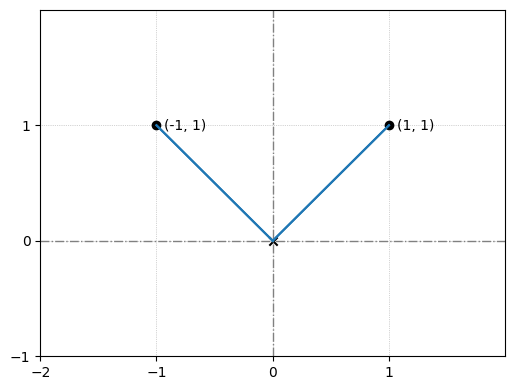

angle of v1 is: 45.0
angle of v1 is: 135.0
angle between v1 and v2 is: 90.0


In [13]:
import math

from utils.vector import to_degree
from utils.draw.component import Points2D, Polygon2D, draw2d  # 对于两个向量

# 对于两个向量
v1 = (1, 1)
v2 = (-1, 1)

# 绘制两个向量的图形
draw2d(
    [
        Points2D([v1, v2]),
        Polygon2D([(0, 0), v1]),
        Polygon2D([(0, 0), v2]),
    ]
)

# 求 v1, v2 的夹角

# v1 的夹角
angle_v1 = to_degree(math.atan2(v1[1], v1[0]))
print(f"angle of v1 is: {angle_v1}")

# v2 的夹角
angle_v2 = to_degree(math.atan2(v2[1], v2[0]))
print(f"angle of v1 is: {angle_v2}")

# 计算夹角
angle = abs(angle_v1 - angle_v2)
print(f"angle between v1 and v2 is: {angle}")